<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-6 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> RNN for Time Series </h2> </html>


RNNs are used for sequence modelling. This tutorial will look at time series data to be modelled and predicted using RNNs. 

In [1]:
# Import Libraries (pandas, numpy, matplotlib)

# ....
# ...
# ...


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, January 25, 2025.



##### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

_________________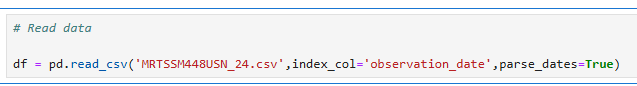

In [5]:
# Read data

df = pd.read_csv('MRTSSM448USN_24.csv',index_col='observation_date',parse_dates=True)

In [ ]:
#pd.read_csv

In [23]:
# Print the first few rows of data
#d
# ...

In [6]:
df.head()

,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


_______________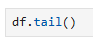

In [7]:
df.tail()

,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [8]:
# Set name of column as 'Sales'. Use - df.columns 

df.columns = ['Sales']

df.head()


,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


Plot your data - Year vs Sales

hint: use df.plot  and plt.show()

____________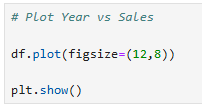

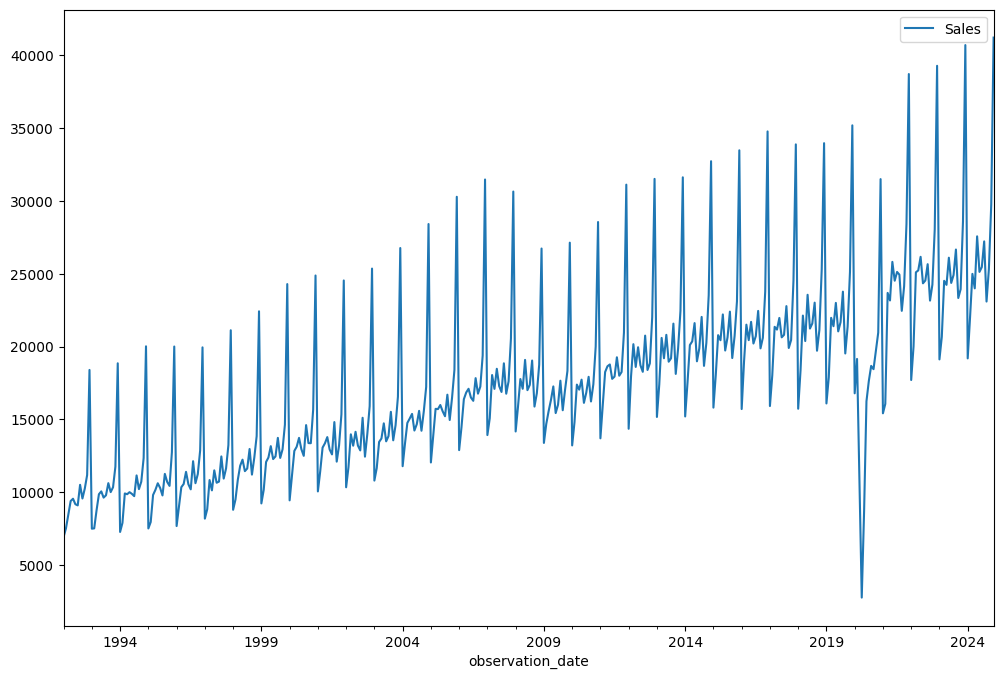

In [9]:
df.plot(figsize=(12,8))

plt.show()

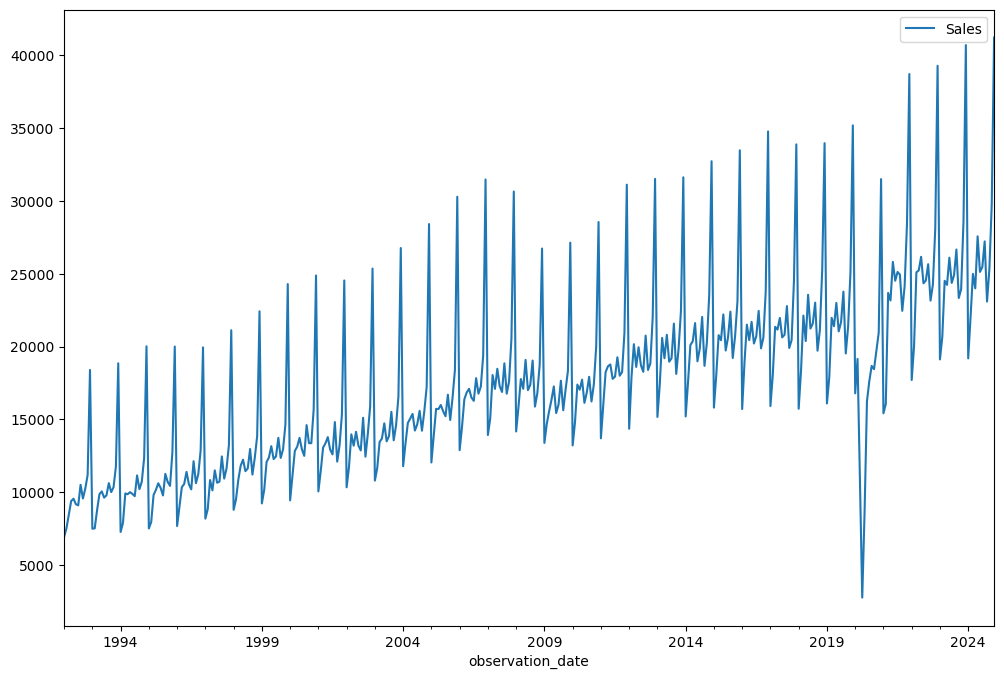

### Train Test Split 

We will use the last 1.5 years (18 months) samples for testing. The rest is for training

______________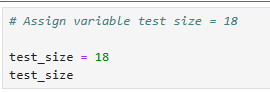

In [10]:
test_size = 18
test_size

18

18

__________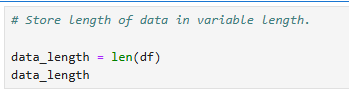

In [11]:
data_length = len(df)
data_length

396

396

__________________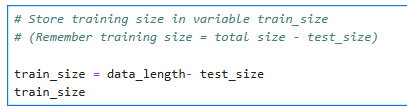

In [12]:
len(df) - 18

378

378

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

____________________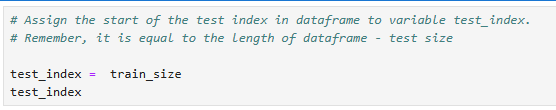

In [13]:
train_size = data_length- test_size
train_size

378

378

Next, we will separate train and test datasets.

_________________________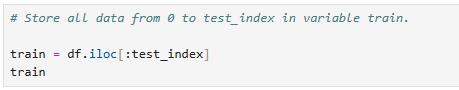

In [14]:
test_index =  train_size
test_index

train = df.iloc[:test_index]
train

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


In [15]:
# Store everything from test_index to the last sample in the test variable 
# Hint - Use df.iloc

test = df.iloc[test_index:]
test

,Sales
observation_date,
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332
2023-10-01,23933
2023-11-01,28580
2023-12-01,40684
2024-01-01,19188
2024-02-01,22005
2024-03-01,24986


,Sales
observation_date,
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332
2023-10-01,23933
2023-11-01,28580
2023-12-01,40684
2024-01-01,19188
2024-02-01,22005
2024-03-01,24986


In [16]:
# Print the size of the train data

# ...

# Print the size of the test data

# ...
print(train.size)
print(test.size)

378
18


378
18


### In Neural Networks, we need to Scale Data between 0-1

___________________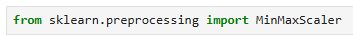

In [17]:
from sklearn.preprocessing import MinMaxScaler

_______________________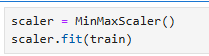

In [18]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

MinMaxScaler()

__________________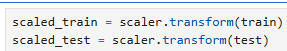

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
# Check if the data has been scaled properly
# Print max and min for train and test

print(scaled_train.max())
print(scaled_test.max())
print(scaled_train.min())
print(scaled_test.min())

1.0
1.0530599939704552
0.0
0.44980403979499545


1.0
1.0530599939704552
0.0
0.44980403979499545


## Time Series Generator

This class takes in a sequence of data points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

### We will use 12 months as input and then predict the next month out


_____________________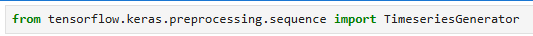

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [70]:
#TimeseriesGenerator?

_________________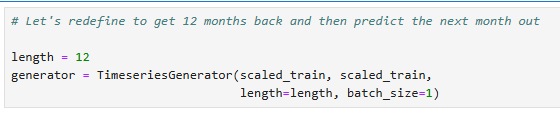

In [22]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length=length, batch_size=1)

_______________________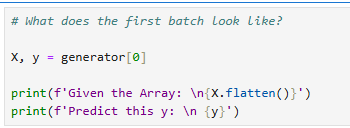

In [23]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
Predict this y: 
 [[0.12952558]]


Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
Predict this y: 
 [[0.12952558]]


### Create the Model

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

________________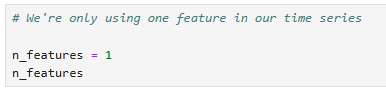

In [25]:
n_features = 1
n_features

1

1

## Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [26]:
# Your code to create your own model
# use input_shape=(length, n_features)
# use model.add(Dense(1)) because it is the regression task
 
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

C:\Users\LOHIDAS\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

_____________________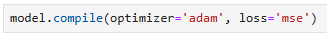

In [28]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. 

Review the video on the Week-6 page for more info on this.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 2 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [29]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, 
                                           length=length, batch_size=1)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

# LAST_DIGIT_IN_YOUR_SID = 

early_stop = EarlyStopping(monitor='val_loss',patience=1)


_____________________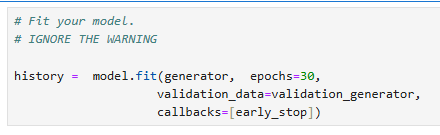

In [33]:
history =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30


C:\Users\LOHIDAS\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


366/366 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0343 - val_loss: 0.0634
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0105 - val_loss: 0.0889


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 0.0364 - val_loss: 0.0283
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0124 - val_loss: 0.0153
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0118 - val_loss: 0.0010
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0047 - val_loss: 0.0127
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 7/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 8/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 9/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 10/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0042 - val_loss: 6.1039e-04
Epoch 11/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0049 - val_loss: 6.4973e-04
Epoch 12/30
366/366 ━━━━━━━━━━━━

_____________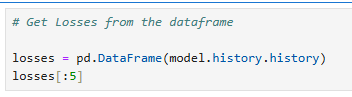

In [34]:
losses = pd.DataFrame(model.history.history)
losses[:5]

,loss,val_loss
0,0.019636,0.063371
1,0.013053,0.088881


In [124]:
# the values may be different


,loss,val_loss
0,0.020090,0.028262
1,0.012648,0.015266
2,0.010198,0.001036
3,0.006880,0.003225
4,0.005237,0.012703


___________________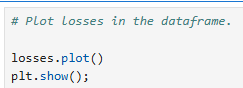

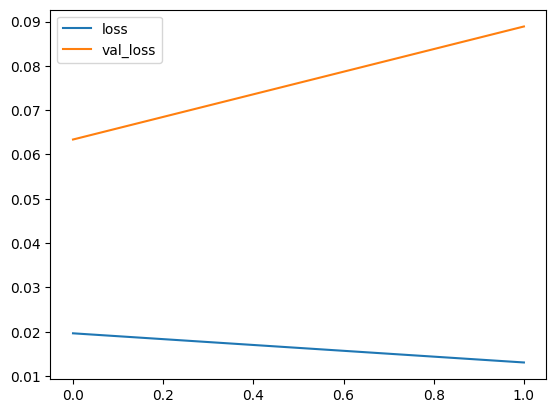

In [35]:
losses.plot()
plt.show();

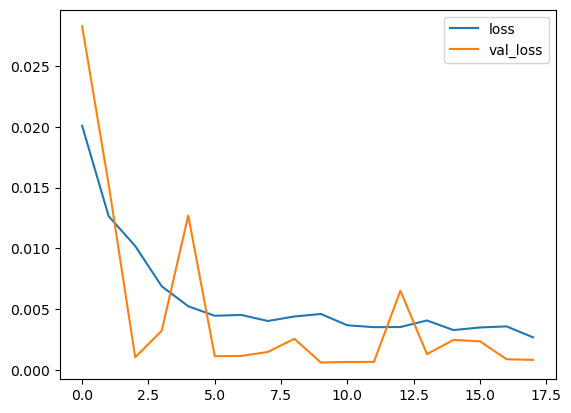

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

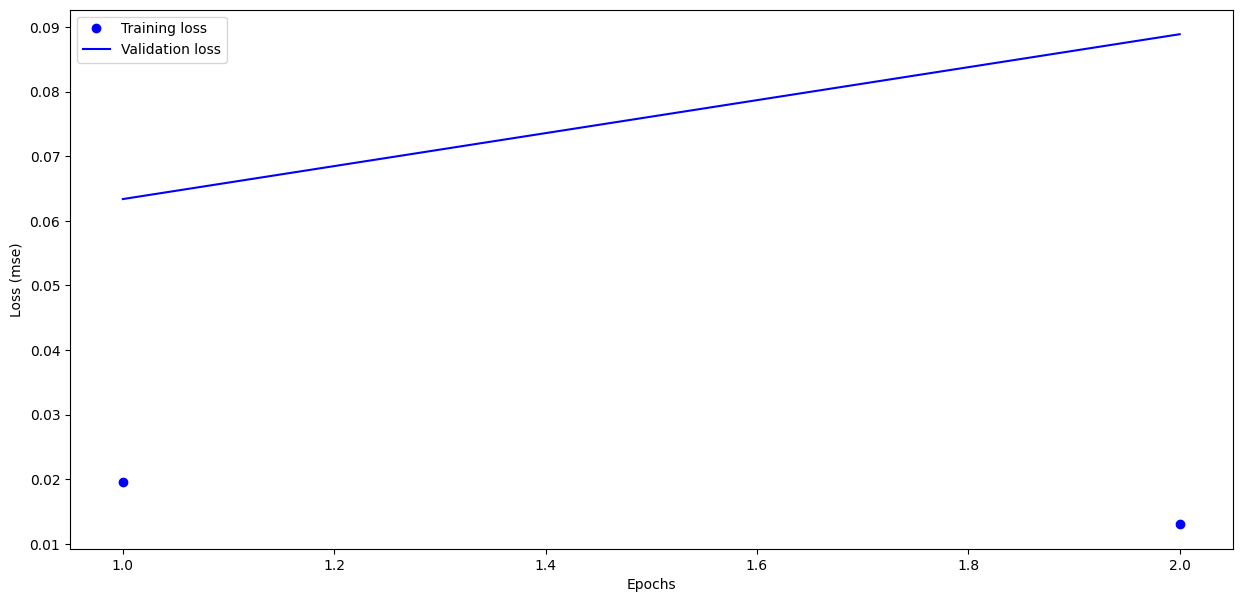

In [36]:
# print Loss for the neural network training process

history_dict = history.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

### Evaluate on Test Data

____________________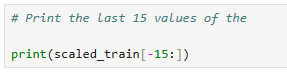

In [37]:
print(scaled_train[-15:])

[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


____________________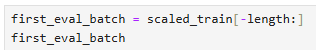

In [39]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.59621235],
       [0.62693562],
       [0.55844547],
       [0.58834653],
       [0.69254803],
       [1.        ],
       [0.44788555],
       [0.49031162],
       [0.59566421],
       [0.58804506],
       [0.63913175],
       [0.59166278]])

array([[0.59621235],
       [0.62693562],
       [0.55844547],
       [0.58834653],
       [0.69254803],
       [1.        ],
       [0.44788555],
       [0.49031162],
       [0.59566421],
       [0.58804506],
       [0.63913175],
       [0.59166278]])

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [40]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

___________________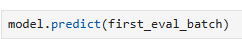

In [41]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


array([[0.88371843]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


array([[0.63285655]], dtype=float32)

_________________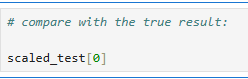

In [42]:
scaled_test[0]

array([0.60665442])

array([0.60665442])

#### Try predicting the series!

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [43]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

In [44]:
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [45]:
test_predictions

[array([0.88371843], dtype=float32),
 array([0.90628576], dtype=float32),
 array([0.9299678], dtype=float32),
 array([1.0492061], dtype=float32),
 array([1.2601004], dtype=float32),
 array([1.3040696], dtype=float32),
 array([1.1076503], dtype=float32),
 array([1.2603916], dtype=float32),
 array([1.4102963], dtype=float32),
 array([1.5789388], dtype=float32),
 array([1.7697005], dtype=float32),
 array([2.211688], dtype=float32),
 array([2.7706318], dtype=float32),
 array([3.3374212], dtype=float32),
 array([4.390494], dtype=float32),
 array([6.4820514], dtype=float32),
 array([9.650023], dtype=float32),
 array([13.321325], dtype=float32)]

### Inverse Transformations and Compare

_________________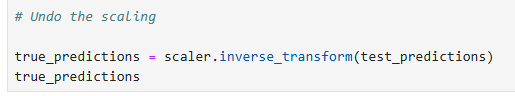

In [46]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 35020.23439175],
       [ 35843.6486268 ],
       [ 36707.73587185],
       [ 41058.3843447 ],
       [ 48753.28200626],
       [ 50357.58889091],
       [ 43190.83576632],
       [ 48763.90805304],
       [ 54233.48186123],
       [ 60386.74152148],
       [ 67347.06313562],
       [ 83473.86157703],
       [103868.04212761],
       [124548.48655152],
       [162971.94982672],
       [239286.60842943],
       [354876.40599918],
       [488831.1962986 ]])

array([[25867.03686076],
       [26708.37140393],
       [25016.20063967],
       [25854.56223851],
       [29340.47320271],
       [40268.42497611],
       [20830.97139931],
       [22252.6564256 ],
       [25053.23304337],
       [25580.6207518 ],
       [27142.1950959 ],
       [26136.75054663],
       [27203.31552541],
       [27836.48089719],
       [26630.20928335],
       [27364.5308798 ],
       [30701.01822633],
       [41377.06135786]])

_____________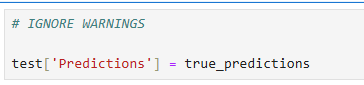

In [47]:
test['Predictions'] = true_predictions

C:\Users\LOHIDAS\AppData\Local\Temp\ipykernel_4872\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


C:\Users\vital\AppData\Local\Temp\ipykernel_18288\3095654106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


### Check and plot predictions

In [48]:
# Print the test variable

# ...
test

,Sales,Predictions
observation_date,,
2023-07-01,24911,35020.234392
2023-08-01,26657,35843.648627
2023-09-01,23332,36707.735872
2023-10-01,23933,41058.384345
2023-11-01,28580,48753.282006
2023-12-01,40684,50357.588891
2024-01-01,19188,43190.835766
2024-02-01,22005,48763.908053
2024-03-01,24986,54233.481861


,Sales,Predictions
observation_date,,
2023-07-01,24911,25867.036861
2023-08-01,26657,26708.371404
2023-09-01,23332,25016.200640
2023-10-01,23933,25854.562239
2023-11-01,28580,29340.473203
2023-12-01,40684,40268.424976
2024-01-01,19188,20830.971399
2024-02-01,22005,22252.656426
2024-03-01,24986,25053.233043


_______________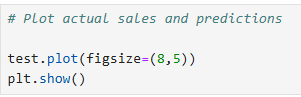

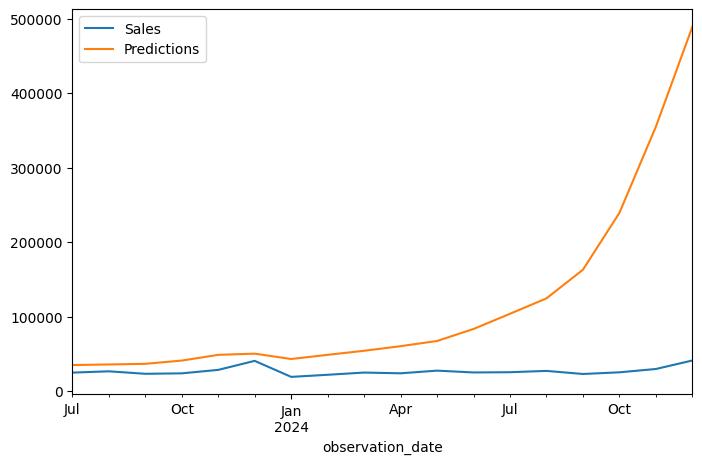

In [49]:
test.plot(figsize=(8,5))
plt.show()

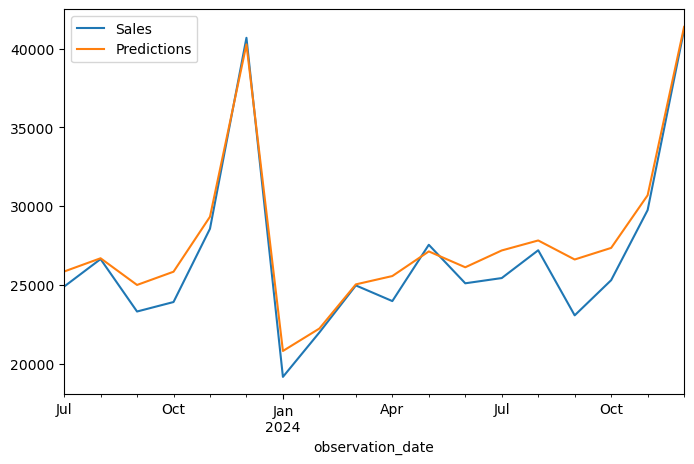

### Retrain and Forecasting

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [50]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [51]:
print(scaled_full_data.max())
print(scaled_full_data.min())

1.0
0.0


In [52]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [53]:
# Use any neural network model based on RNN
# You can also use the model created above
#
# Create the model

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

C:\Users\LOHIDAS\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
# your code to compile the model

# ...

In [55]:
model.compile(optimizer='adam', loss='mse')

In [56]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

# LAST_DIGIT_IN_YOUR_SID = 

early_stop = EarlyStopping(monitor='val_loss',patience=1)


____________________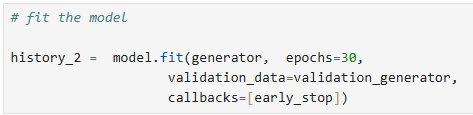

In [57]:
# fit the model

history_2 =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30


C:\Users\LOHIDAS\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0341 - val_loss: 0.0236
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0125 - val_loss: 0.0347


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

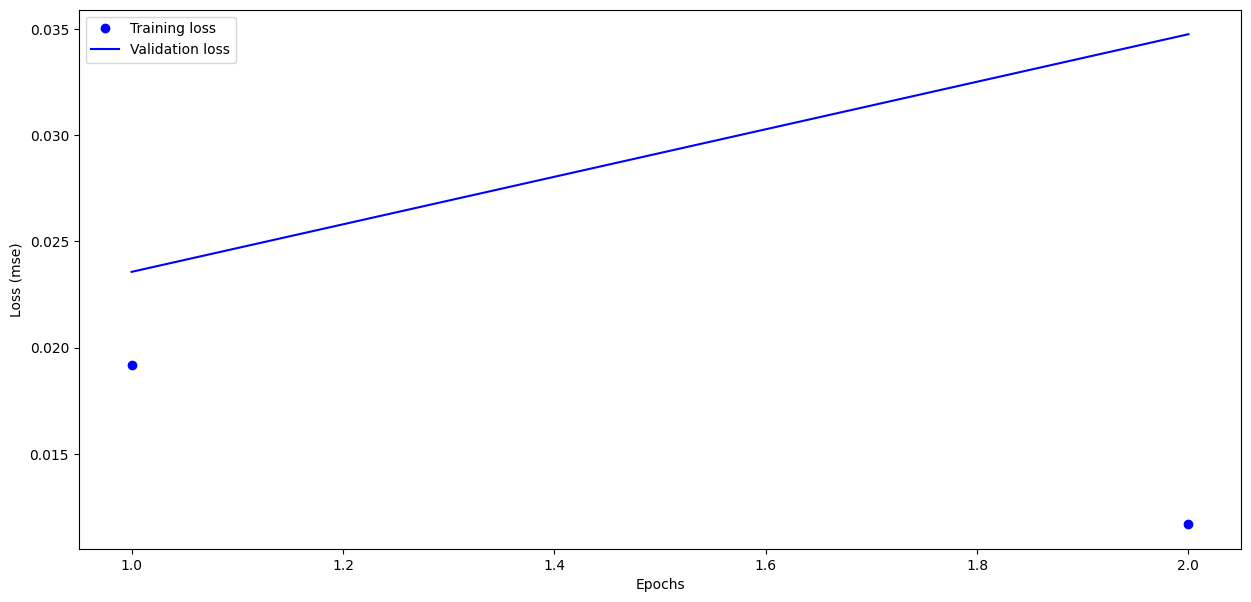

In [58]:
# print Loss for the neural network training process

history_dict = history_2.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [215]:
# You can use the code created above to type the next cell code

_________________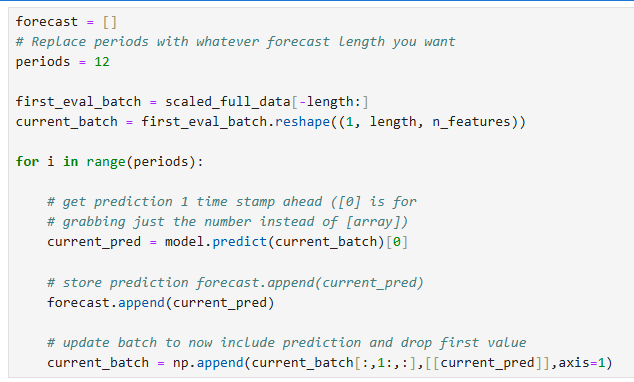

In [59]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction forecast.append(current_pred)
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


______________________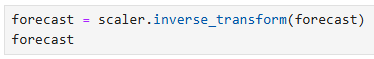

In [60]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[28094.08097672],
       [30070.27557582],
       [31935.40123612],
       [32938.29910082],
       [34975.59020668],
       [34996.71833694],
       [36573.68587774],
       [38590.47736901],
       [38411.25253993],
       [42782.14835119],
       [52976.39399505],
       [57448.3111937 ]])

array([[18620.61448288],
       [20206.91406763],
       [22167.73939276],
       [21757.40348327],
       [23828.92585731],
       [22448.01823115],
       [22479.73978627],
       [23555.70857722],
       [21352.45454019],
       [22294.99097872],
       [25707.46347636],
       [37294.23667431]])

### Creating new timestamp index with pandas.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 4 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [61]:
df

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318


In [62]:
forecast_index = pd.date_range(start='2025-01-01',periods=periods,freq='MS')

In [63]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [64]:
forecast_df

,Forecast
2025-01-01,28094.080977
2025-02-01,30070.275576
2025-03-01,31935.401236
2025-04-01,32938.299101
2025-05-01,34975.590207
2025-06-01,34996.718337
2025-07-01,36573.685878
2025-08-01,38590.477369
2025-09-01,38411.252540
2025-10-01,42782.148351


__________________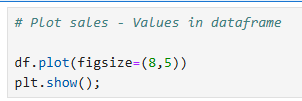

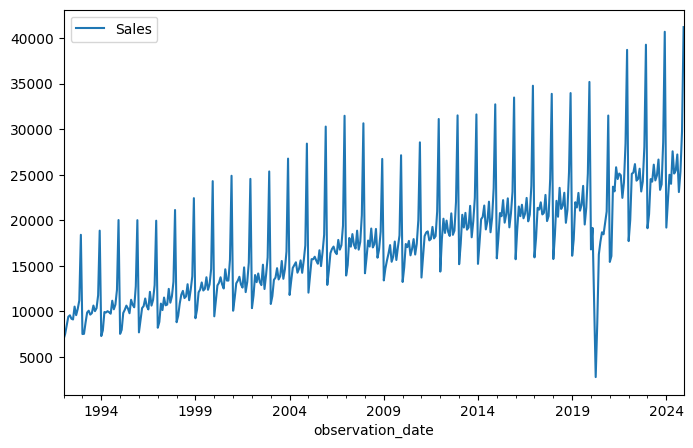

In [65]:
df.plot(figsize=(8,5))
plt.show();

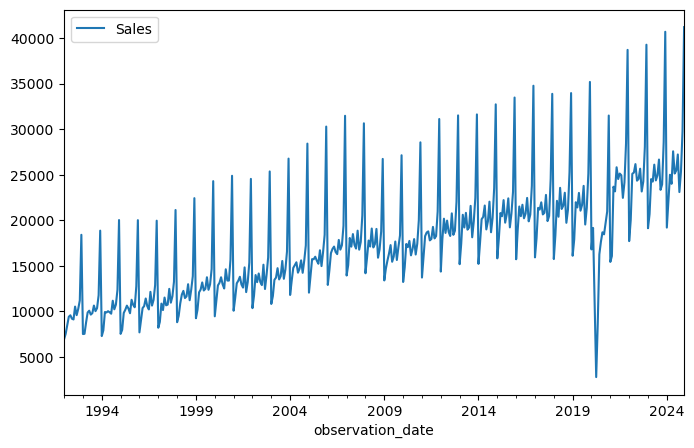

____________________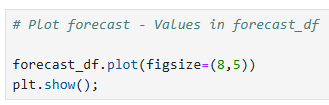

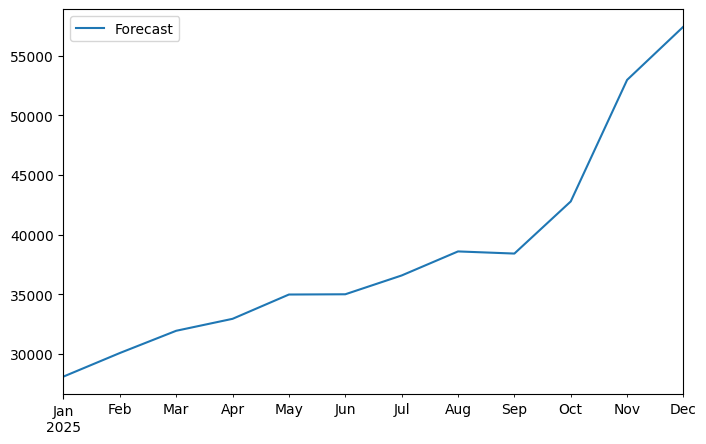

In [66]:
forecast_df.plot(figsize=(8,5))
plt.show();

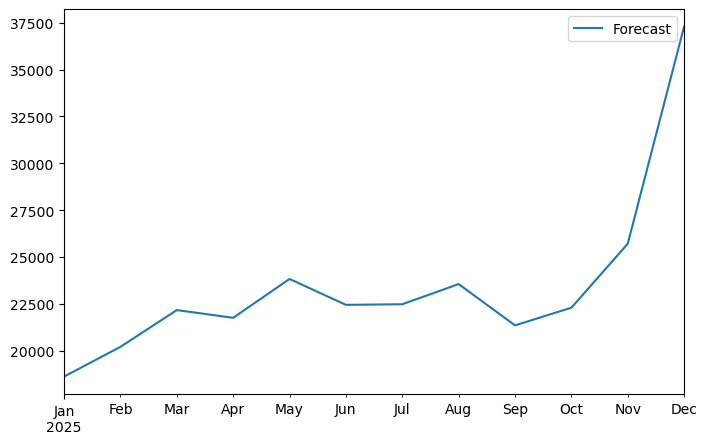

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

________________________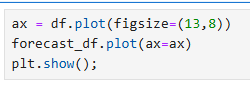

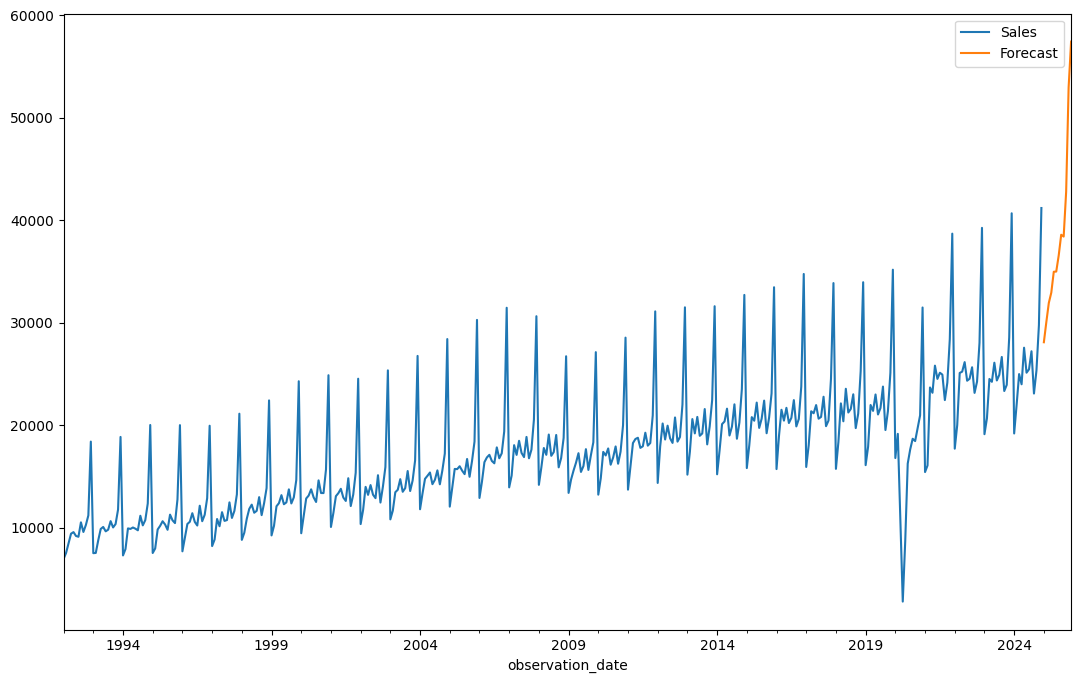

In [67]:
ax = df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)
plt.show();

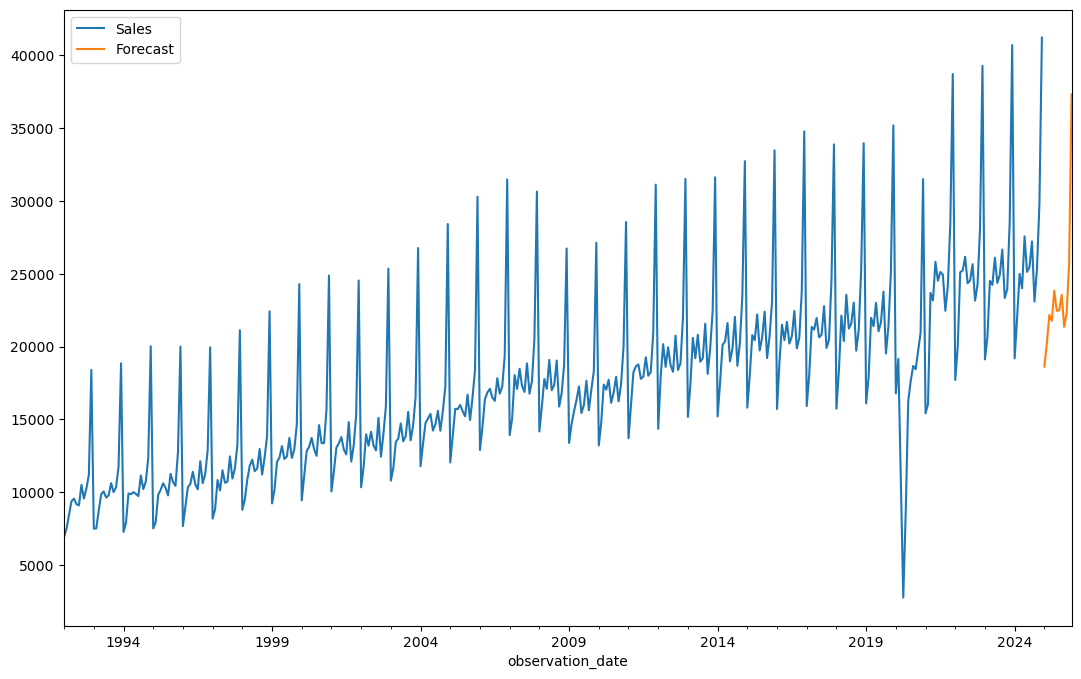

_______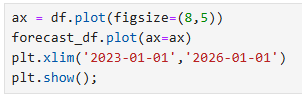

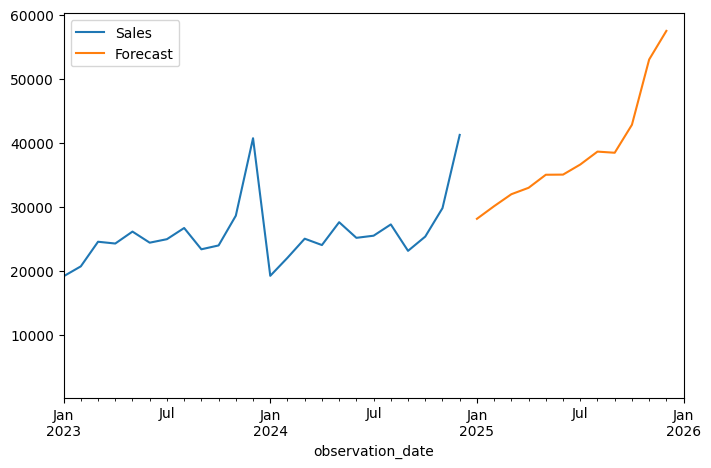

In [68]:
ax = df.plot(figsize=(8,5))
forecast_df.plot(ax=ax)
plt.xlim('2023-01-01','2026-01-01')
plt.show();

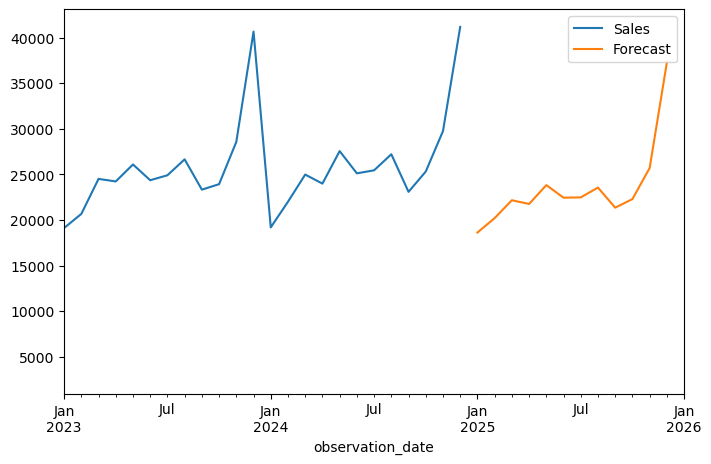

### Cecking Forecast for last 12 months

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [69]:
forecast_index = pd.date_range(start='2024-01-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [70]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                           columns=['Forecast'])

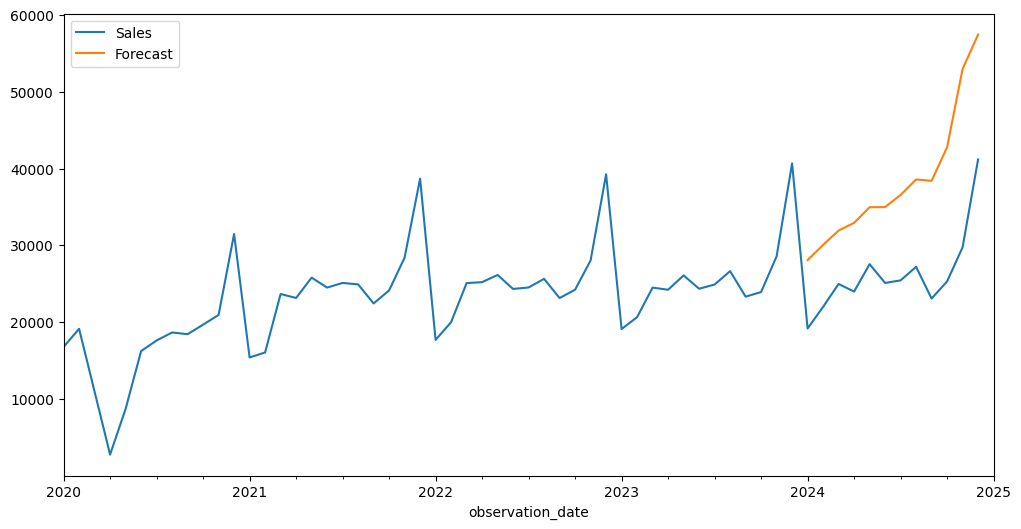

In [71]:
ax = df.plot(figsize=(12,6))
forecast_df.plot(ax=ax)
plt.xlim('2020-01-01','2025-01-01')
plt.show();

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot of the 2nd model's summary

### 2. Copy your early-stop code and history_2 fit-training-process

### 3. Please record the plot of validation and test loss of history_2.

### 4. Based on this analysis, determine the optimal number of epochs for training your model. 

### Try the same example with a LSTM and GRU! (Optional)
Hint: Use LSTM instead of SimpleRNN!